<a href="https://colab.research.google.com/github/Inryu/capstone-design-exception/blob/main/deep-learning/6_4_%EB%B0%94%EB%A5%B8_%ED%95%99%EC%8A%B5%EC%9D%84_%EC%9C%84%ED%95%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## __6.4 바른 학습을 위해__

### __6.4.1 오버피팅__

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/deep-learning-from-scratch-master/

/content/drive/MyDrive/deep-learning-from-scratch-master


In [ ]:
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)
# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

In [ ]:
network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

epoch:0, train acc:0.07333333333333333, test acc:0.1062
epoch:1, train acc:0.09, test acc:0.1128
epoch:2, train acc:0.1, test acc:0.1207
epoch:3, train acc:0.12333333333333334, test acc:0.1297
epoch:4, train acc:0.15666666666666668, test acc:0.1356
epoch:5, train acc:0.18, test acc:0.1507
epoch:6, train acc:0.21, test acc:0.1664
epoch:7, train acc:0.24, test acc:0.1847
epoch:8, train acc:0.26666666666666666, test acc:0.2016
epoch:9, train acc:0.2966666666666667, test acc:0.2189
epoch:10, train acc:0.32, test acc:0.2312
epoch:11, train acc:0.3333333333333333, test acc:0.2455
epoch:12, train acc:0.3466666666666667, test acc:0.2523
epoch:13, train acc:0.34, test acc:0.2587
epoch:14, train acc:0.36666666666666664, test acc:0.2681
epoch:15, train acc:0.36666666666666664, test acc:0.2784
epoch:16, train acc:0.39666666666666667, test acc:0.2881
epoch:17, train acc:0.42333333333333334, test acc:0.2921
epoch:18, train acc:0.43666666666666665, test acc:0.3074
epoch:19, train acc:0.44, test acc:0

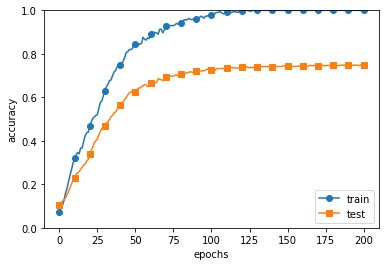

In [ ]:
# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### __6.4.3 드롭아웃__

In [ ]:
class Dropout:
  def __init__(self, dropout_ratio=0.5):
    self.dropout_ratio = dropout_ratio
    self.mask = None

  def forward(self, x, train_flag=True):
    if train_flg:
      self.mask = np.random.rand(*x.shape) > self.dropout_ratio
      return x * self.mask
    else:
      return x * (1.0 - self.dropout_ratio)

  def backward(self, dout):
    return dout * self.mask

train loss:2.3209164923315533
=== epoch:1, train acc:0.12666666666666668, test acc:0.1023 ===
train loss:2.30562212164764
train loss:2.305538344439558
train loss:2.3097776280305267
=== epoch:2, train acc:0.12666666666666668, test acc:0.1025 ===
train loss:2.2979162400331763
train loss:2.2901416775917434
train loss:2.295266293291834
=== epoch:3, train acc:0.13, test acc:0.1038 ===
train loss:2.288698837872696
train loss:2.3012733853302914
train loss:2.3031376388586287
=== epoch:4, train acc:0.13, test acc:0.1046 ===
train loss:2.2756798868176005
train loss:2.289083674810895
train loss:2.2827318970210255
=== epoch:5, train acc:0.14, test acc:0.1072 ===
train loss:2.281790326165276
train loss:2.293309638311889
train loss:2.305397813097324
=== epoch:6, train acc:0.14666666666666667, test acc:0.1094 ===
train loss:2.3082862243975044
train loss:2.294036497702744
train loss:2.289261660589129
=== epoch:7, train acc:0.15333333333333332, test acc:0.1121 ===
train loss:2.301333674042112
train los

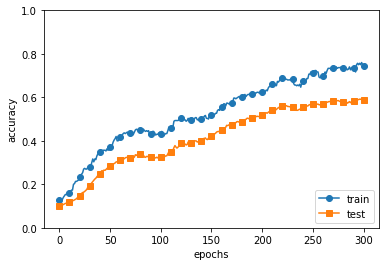

In [ ]:
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()